<a href="https://colab.research.google.com/github/adams-gc/medicine-_recommendation_system/blob/main/credict__classification__bank__data_project(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# To build a machine learning model for classifying credit scores based on the given dataset, we will follow these steps:

1. Data Understanding: Understand the dataset, its structure, and the significance of each column.
2. Data Preprocessing: Handle missing values, convert data types, and encode categorical variables.
3. Feature Selection: Select relevant features for the model.
4. Train-Test Split: Split the dataset into training and testing sets.
5. Model Selection: Choose an appropriate machine learning algorithm for classification.
6. Model Training: Train the model on the training data.
7. Model Evaluation: Evaluate the model's performance on the test data.
8. Prediction: Predict credit scores based on new data.
*  



In [1]:
# "C:\Users\adams\Downloads\test.csv\test.csv"

In [2]:
import pandas as pd
import numpy as np
df= pd .read_csv('/content/test.csv')

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


#identify missing data

In [4]:
df.info()  # Overview of non-null counts and data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [5]:
# statistical info about categorical features only
df.describe(include=object).T

,count,unique,top,freq
ID,50000,50000,0x160a,1
Customer_ID,50000,12500,CUS_0xd40,4
Month,50000,4,September,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,109945.32,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


In [6]:
df1=df.copy()

1. "Monthly_Balance" which should be a numerical feature has incorrect datatype and on the top of that the data point has strange values i.e "__". So before converting that into numerical feature we have to take care of that.
2. "Credit_History_Age": we need to create a custome function to convert it into numbers.
To handle null values and also the outliers, I will be using "group mode". Grouping will be done on the basis of customer_id.


# Data Cleaning, Data type fix and replaceing Null values

In [7]:
# cleaninf
df1.duplicated().any()

False

In [8]:
# Since we are doing grouping on the basis of customer_id we have to be sure that it does not have null
df1["Customer_ID"].isnull().sum()

0

In [9]:

df1["Customer_ID"].describe()

,Customer_ID
count,50000
unique,12500
top,CUS_0xd40
freq,4



We have 12,494 unique customers. These customers have taken multiple loans and each loan taken by the customer has become a row in our dataset.

In [10]:
#dropping unnecessary columns
df_1 = df1.drop(columns=["ID","Name","SSN"])
# columns with unique values do not contribute to the model building process. hence dropped
# Note: Customer_ID is also such column and we are going to drop it too when we are done with the cleaning.

In [11]:
object_col = df_1.describe(include="O").columns
object_col
# to identify object column

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [12]:
#nderstanding the distribution of categorical variables or errors in data.
for i in object_col:
    print(f"----------------{i}------------------")
    print(df_1[i].value_counts())
    print("\n")

----------------Customer_ID------------------
Customer_ID
CUS_0xd40     4
CUS_0x9bf4    4
CUS_0x5ae3    4
CUS_0xbe9a    4
CUS_0x4874    4
             ..
CUS_0x2eb4    4
CUS_0x7863    4
CUS_0x9d89    4
CUS_0xc045    4
CUS_0x942c    4
Name: count, Length: 12500, dtype: int64


----------------Month------------------
Month
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64


----------------Age------------------
Age
39      1493
32      1440
44      1428
22      1422
35      1414
        ... 
437        1
1419       1
120        1
2552       1
4975       1
Name: count, Length: 976, dtype: int64


----------------Occupation------------------
Occupation
_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manag

In [13]:
# Clear strange values apart from the NaN Values
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str): # isinstance(data, str) checks if data is string or not
        return data
    else:
        return str(data).strip("_ ,")

In [14]:
df_1 = df_1.applymap(text_cleaning)
df_1 = df_1.replace(["", "nan", "!@9#%8"],np.NaN)
# "!@9#%8" was in payment behiaviour column

<ipython-input-14-6d41c9c44c25>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_1 = df_1.applymap(text_cleaning)


In [15]:
# for missing dta
def missing_data(dataframe):
    dataframe_copy = dataframe.copy()
    dataframe_copy = dataframe_copy.isnull().sum().reset_index()
    dataframe_copy.columns = ["Feature", "Null_Values"]
    total_data = dataframe.shape[0]
#     print(total_data)
    dataframe_copy["%_age"] = dataframe_copy["Null_Values"] / total_data * 100
    return dataframe_copy[dataframe_copy["Null_Values"] != 0]

In [16]:
# Check for missing values
missing_data(df_1)

,Feature,Null_Values,%_age
3,Occupation,3438,6.876
5,Monthly_Inhand_Salary,7498,14.996
10,Type_of_Loan,5704,11.408
12,Num_of_Delayed_Payment,3498,6.996
13,Changed_Credit_Limit,1059,2.118
14,Num_Credit_Inquiries,1035,2.070
15,Credit_Mix,9805,19.610
18,Credit_History_Age,4470,8.940
21,Amount_invested_monthly,2271,4.542
22,Payment_Behaviour,3800,7.600


1. majority of null value  are in occupation,credit_mix,Changed_Credit_Limit	,Changed_Credit_Limit
2.There is Null Value in the Target columns (Credit_mix) we had to drop that row completely and not replacing it with anything.

In [17]:
df_1.dropna(subset=['Credit_Mix'], inplace=True)

In [18]:
#df_1.isnull().sum()

# Data type Fix
Columns that needs to be converted to int/float

1. Age
2. Annual_Income
3. Num_of_Loan
4. Num_of_Delayed_Payment
5. Changed_Credit_Limit
6. Outstanding_Debt
7. Amount_invested_monthly
8. Monthly_Balance
9. Month
10. Customer_ID
11. Credit_History_Age
'Customer_ID', 'Month', 'Occupation', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'



If we would have tried converting the data type befor cleaning than we would have experienced errors.




In [19]:
df_1["Month"] = pd.to_datetime(df_1.Month, format='%B').dt.month

In [20]:
lst1 = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment",
        "Changed_Credit_Limit", "Outstanding_Debt", "Amount_invested_monthly",
        "Monthly_Balance"]
for i in lst1:
    df_1[i] = df_1[i].astype(float)

In [21]:
# Each Customer_ID is of the form 'CUS_0xd40' >> x[4]: 0xd40 (A hexadecimal number) which is then
# converted to interger using base 16.
df_1["Customer_ID"] = df_1.Customer_ID.apply(lambda x: int(x[4:], 16))


In [22]:
# Credit_History_Age has values like this >> 22 Years and 1 Months
def month_convertor(x):
    if pd.notnull(x): # check if the value is not null then only do these
        num1 = int(x.split(" ")[0]) # extract 22 (years)
        num2 = int(x.split(" ")[3]) # extract 1 (months)
        return (num1 * 12) + num2   # final convert everything in months.
    else:
        return x # if the value is null return null"

In [23]:
df_1["Credit_History_Age"] = df_1["Credit_History_Age"].apply(month_convertor)

In [24]:
df_1.groupby("Customer_ID")["Credit_History_Age"].apply(list)

,Credit_History_Age
Customer_ID,
1006,"[190.0, 191.0, 192.0, 193.0]"
1007,"[354.0, 355.0, nan, 357.0]"
1008,"[300.0, 301.0, 302.0, nan]"
1009,"[339.0, 341.0, 342.0]"
1011,"[187.0, 188.0, 189.0, 190.0]"
...,...
50984,"[nan, 168.0]"
50990,"[78.0, 80.0]"
50992,"[167.0, nan, 169.0, 170.0]"


In [25]:
len(df_1.groupby("Customer_ID")["Type_of_Loan"].apply(list)[1006])

4

1. Understand that each customer (say customer 1006) has come multiple times(8 times) in the dataset (each time a new entry has been made by Bureu)
2. Each element in the list corresponds to value in its each occurence.

In [26]:
df_1[df_1["Customer_ID"] == 1006]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
7372,1006,9,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,...,13.0,Standard,1941.73,38.204626,190.0,Yes,27.442089,116.544106,Low_spent_Small_value_payments,279.148639
7373,1006,10,38.0,Journalist,16756.18,1331.348333,9,6,22,2.0,...,13.0,Standard,1941.73,36.807543,191.0,Yes,27.442089,79.080874,Low_spent_Medium_value_payments,306.611870
7374,1006,11,38.0,Journalist,16756.18,NaN,9,6,22,2.0,...,13.0,Standard,1941.73,32.310398,192.0,Yes,27.442089,93.815678,Low_spent_Small_value_payments,301.877066
7375,1006,12,38.0,Journalist,16756.18,1331.348333,9,750,22,-100.0,...,13.0,Standard,1941.73,24.180362,193.0,Yes,27.442089,168.435840,Low_spent_Small_value_payments,227.256904


Special column > Type_of_Loan

We have to convert "Type_of_Loan" in comma sepeared values so that when we can make one-hot vector

In [27]:
def type_of_loan(x):
    if pd.notna(x):
        x = x.lower().replace("and ", "")
        x = x.replace(", ", ",")
        x = x.strip()
        return x
    else:
        return x

In [28]:
df_1["Type_of_Loan"] = df_1["Type_of_Loan"].apply(type_of_loan)

In [29]:
# Unique loans that all of these customer took
unique_loans = []
for each_row in df_1["Type_of_Loan"].dropna():
#     print(each_row.split(","))
    for each_loan in each_row.split(","):
        if each_loan not in unique_loans:
            unique_loans.append(each_loan)

unique_loans = dict(enumerate(sorted(unique_loans)))
unique_loans

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

#Reassign Group Mode Values to null values and EDA

In [30]:
# object columns
# for column with data type "object".
#group_mode(dataframe, group_by, column) is designed to calculate the mode (most frequent value) of a specific column within a DataFrame, grouped by one or more other columns.
def group_mode(dataframe, group_by, column):
    mode_by_group = dataframe.groupby(group_by)[column].transform(lambda x : x.mode()[0] if not x.mode().empty else np.NaN)
    result = dataframe[column].fillna(mode_by_group)
    return result

In [31]:
# occupation
#before:
df_1.groupby("Customer_ID")["Occupation"].apply(list)

,Occupation
Customer_ID,
1006,"[Journalist, Journalist, Journalist, Journalist]"
1007,"[Manager, Manager, Manager, Manager]"
1008,"[Developer, Developer, Developer, Developer]"
1009,"[Accountant, Accountant, Accountant]"
1011,"[nan, Writer, Writer, Writer]"
...,...
50984,"[Mechanic, Mechanic]"
50990,"[Lawyer, Lawyer]"
50992,"[Journalist, nan, Journalist, Journalist]"


1. Look at the customer 50999. Out of his x number of occurences in the dataset, most of the types he/she was Accountant, only in one occurence it was null.
2. MODE(entire dataset["Occupation"]) > Lawyer.
3. So, Instead of replacing this null by the mode of the entire dataset["Occupation"]. I choose to replace it with the group mode. Meaning customer 1009 comes 9/10 times as account so 1/10 time he/she has to be Accountant only.

In [32]:
# remove the nan value with moad
df_1["Occupation"] = group_mode(df_1, "Customer_ID", column = "Occupation")

In [33]:
#after
df_1.groupby("Customer_ID")["Occupation"].apply(list)

,Occupation
Customer_ID,
1006,"[Journalist, Journalist, Journalist, Journalist]"
1007,"[Manager, Manager, Manager, Manager]"
1008,"[Developer, Developer, Developer, Developer]"
1009,"[Accountant, Accountant, Accountant]"
1011,"[Writer, Writer, Writer, Writer]"
...,...
50984,"[Mechanic, Mechanic]"
50990,"[Lawyer, Lawyer]"
50992,"[Journalist, Journalist, Journalist, Journalist]"


In [34]:
# group mode is not required
# since for a customer whose one instance has nan, its all instances have nan.
df_1["Occupation"].replace(np.NaN,"No Data", inplace=True)

<ipython-input-34-c2651e186b20>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1["Occupation"].replace(np.NaN,"No Data", inplace=True)


In [35]:
#before
df_1.groupby("Customer_ID")["Type_of_Loan"].apply(list)

,Type_of_Loan
Customer_ID,
1006,"[credit-builder loan,payday loan, credit-build..."
1007,"[home equity loan,mortgage loan,student loan, ..."
1008,"[nan, nan, nan, nan]"
1009,"[credit-builder loan,student loan,not specifie..."
1011,"[personal loan,auto loan,auto loan, personal l..."
...,...
50984,"[home equity loan,mortgage loan,payday loan,mo..."
50990,"[mortgage loan,auto loan,auto loan, mortgage l..."
50992,"[student loan,credit-builder loan,mortgage loa..."


1. also in 509996 has nana they are all nana

In [36]:
# group mode is not required
# since for a customer whose one instance has nan, its all instances have nan.
df_1["Type_of_Loan"].replace(np.NaN,"No Data", inplace=True)

<ipython-input-36-7fe0e8ddb342>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1["Type_of_Loan"].replace(np.NaN,"No Data", inplace=True)


In [37]:

#after
df_1.groupby("Customer_ID")["Type_of_Loan"].apply(list)

,Type_of_Loan
Customer_ID,
1006,"[credit-builder loan,payday loan, credit-build..."
1007,"[home equity loan,mortgage loan,student loan, ..."
1008,"[No Data, No Data, No Data, No Data]"
1009,"[credit-builder loan,student loan,not specifie..."
1011,"[personal loan,auto loan,auto loan, personal l..."
...,...
50984,"[home equity loan,mortgage loan,payday loan,mo..."
50990,"[mortgage loan,auto loan,auto loan, mortgage l..."
50992,"[student loan,credit-builder loan,mortgage loa..."


In [38]:
# before
df_1.groupby("Customer_ID")["Credit_Mix"].apply(list)

,Credit_Mix
Customer_ID,
1006,"[Standard, Standard, Standard, Standard]"
1007,"[Standard, Standard, Standard, Standard]"
1008,"[Standard, Standard, Standard, Standard]"
1009,"[Standard, Standard, Standard]"
1011,"[Standard, Standard, Standard, Standard]"
...,...
50984,"[Standard, Standard]"
50990,"[Standard, Standard]"
50992,"[Standard, Standard, Standard, Standard]"


In [39]:
df_1["Credit_Mix"] = group_mode(df_1, "Customer_ID", column = "Credit_Mix")

In [40]:
# after
df_1.groupby("Customer_ID")["Credit_Mix"].apply(list)

,Credit_Mix
Customer_ID,
1006,"[Standard, Standard, Standard, Standard]"
1007,"[Standard, Standard, Standard, Standard]"
1008,"[Standard, Standard, Standard, Standard]"
1009,"[Standard, Standard, Standard]"
1011,"[Standard, Standard, Standard, Standard]"
...,...
50984,"[Standard, Standard]"
50990,"[Standard, Standard]"
50992,"[Standard, Standard, Standard, Standard]"


In [41]:
# payment behiviour
# before
df_1.groupby("Customer_ID")["Payment_Behaviour"].apply(list)
# check customer id

,Payment_Behaviour
Customer_ID,
1006,"[Low_spent_Small_value_payments, Low_spent_Med..."
1007,"[Low_spent_Medium_value_payments, Low_spent_La..."
1008,"[High_spent_Small_value_payments, High_spent_S..."
1009,"[Low_spent_Medium_value_payments, High_spent_M..."
1011,"[Low_spent_Large_value_payments, Low_spent_Med..."
...,...
50984,"[Low_spent_Small_value_payments, High_spent_Sm..."
50990,"[Low_spent_Small_value_payments, High_spent_Me..."
50992,"[High_spent_Small_value_payments, Low_spent_La..."


In [42]:
# group mode is not required
# since for a customer whose one instance has nan, its all instances have nan.
df_1["Payment_Behaviour"].replace(np.NaN,"No Data", inplace=True)

<ipython-input-42-c66301aba444>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1["Payment_Behaviour"].replace(np.NaN,"No Data", inplace=True)


In [43]:
(df_1.groupby("Customer_ID")["Payment_Behaviour"].apply(lambda x: x.isnull().sum())).sum()

# The function lambda x: x.isnull().sum() calculates the number of null values within each group's "Payment_Behaviour" Series

0

In [44]:
df_1["Payment_Behaviour"] = group_mode(df_1, "Customer_ID", column = "Payment_Behaviour")

In [45]:
#after
df_1.groupby("Customer_ID")["Payment_Behaviour"].apply(list)[1009]

['Low_spent_Medium_value_payments',
 'High_spent_Medium_value_payments',
 'High_spent_Medium_value_payments']

In [46]:
missing_data(df_1[list(df_1.describe(include="O").columns)])
# NO object data type column has missing values

,Feature,Null_Values,%_age


In [47]:
# data visualization

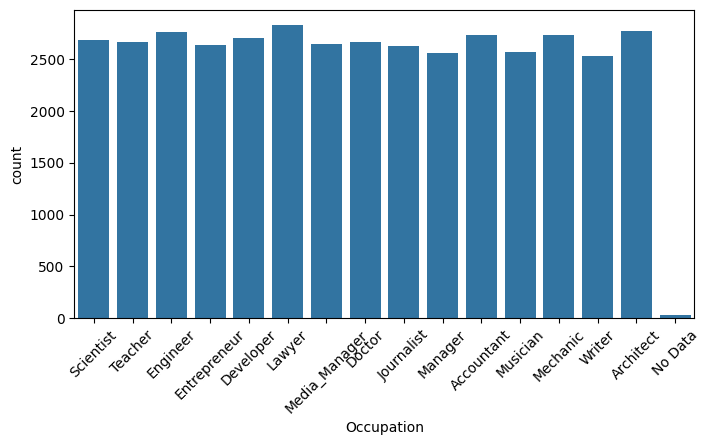

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.countplot(data = df_1, x = "Occupation")
plt.xticks(rotation=45)
plt.show()

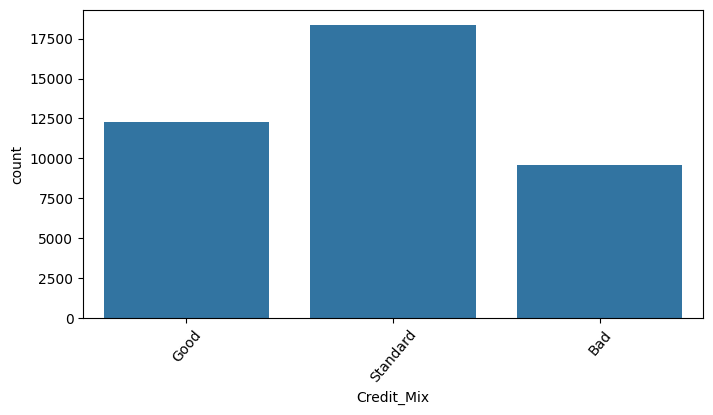

In [49]:
# for credit_mix
plt.figure(figsize=(8,4))
sns.countplot(data = df_1, x = "Credit_Mix")
plt.xticks(rotation=50)
plt.show()

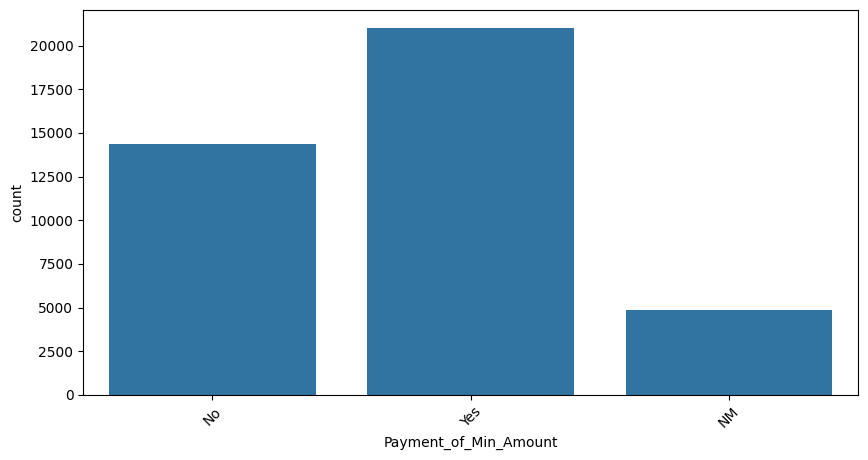

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_1, x = "Payment_of_Min_Amount")
plt.xticks(rotation=45)
plt.show()

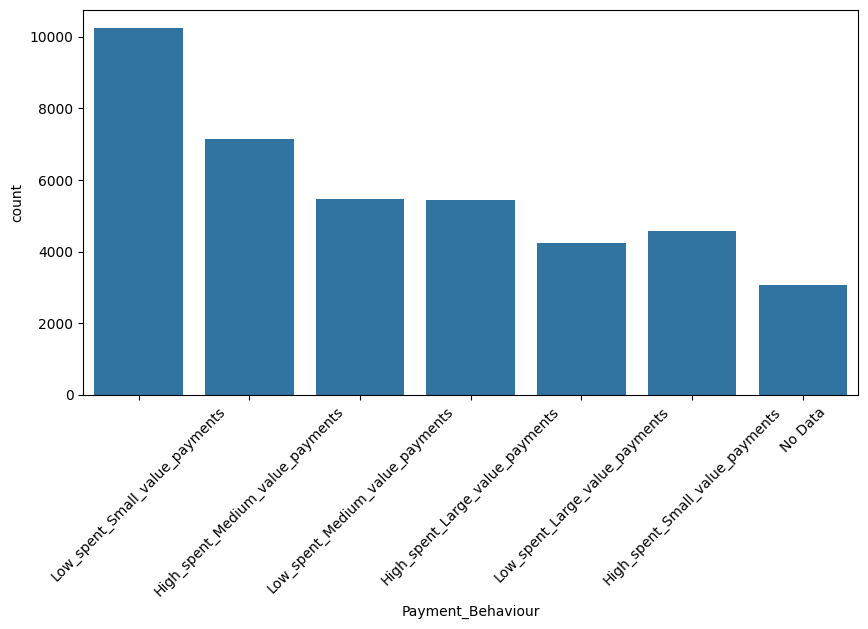

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_1, x = "Payment_Behaviour")
plt.xticks(rotation=45)
plt.show()

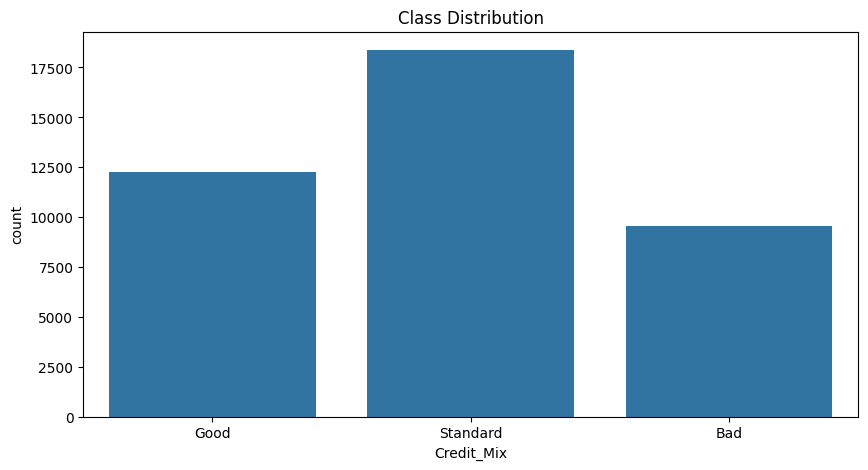

In [52]:

plt.figure(figsize=(10,5))
sns.countplot(data = df_1, x = "Credit_Mix")
plt.title("Class Distribution")
plt.show()

# numeric columns

In [53]:
!pip install scipy
# Import the 'stats' module from 'scipy'
from scipy import stats
import numpy as np
import pandas as pd

In [54]:
# Define Outlier Range
def get_iqr_lower_upper(dataframe, column, multiply=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1

    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = dataframe.loc[(dataframe[column]<lower)|(dataframe[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [55]:
def replace_group_outliers_fillna(dataframe, group_by, column):
    # drop nan values before doing anything
    df_dropped = dataframe[dataframe[column].notna()]
    # for each customer(group) : list all the values in the column for a group
    df_grouped = df_dropped.groupby(group_by)[column].apply(list)
    # find groupwise mode
    df_grouped = df_grouped.apply(lambda x: stats.mode(x)[0])
    # above dataframe will have groupby modes then calculate min and max of all customers
    mini, maxi = df_grouped.apply([min, max])
    # assign Wrong Values to NaN
    col = dataframe[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x) # or condition
   # replace wrong value to nan
    # before assinging check if mode is empty of not
    mode_by_group = dataframe.groupby(group_by)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    result = col.fillna(mode_by_group)
    # mode_by_group will provide the values to be filled for nulls
    # fillna takes the index of null value in col and search it in mode_by_group and when it finds it
    # it will replace nan with the found value.
    return result

In [56]:
# for age

#Before
df_1.groupby("Customer_ID")["Age"].apply(list)

,Age
Customer_ID,
1006,"[38.0, 38.0, 38.0, 38.0]"
1007,"[48.0, 48.0, 48.0, 49.0]"
1008,"[37.0, 37.0, 37.0, 37.0]"
1009,"[23.0, 23.0, 23.0]"
1011,"[44.0, 44.0, 44.0, 44.0]"
...,...
50984,"[21.0, 21.0]"
50990,"[38.0, 38.0]"
50992,"[24.0, 24.0, 24.0, -500.0]"


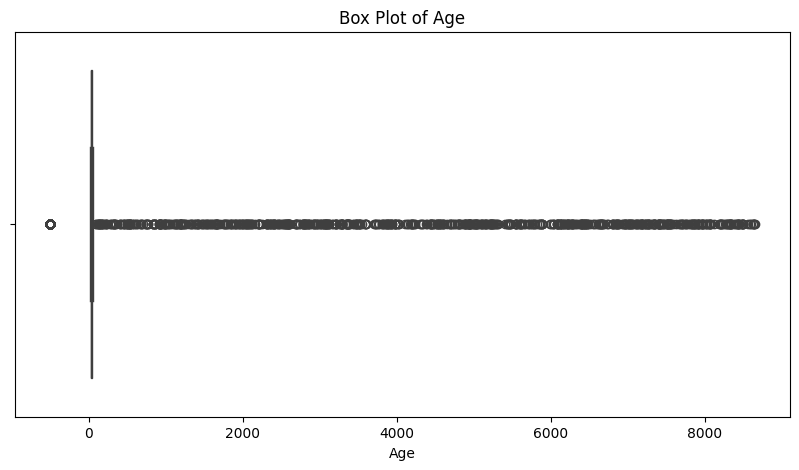

In [57]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Age")
plt.title("Box Plot of Age")
plt.show()

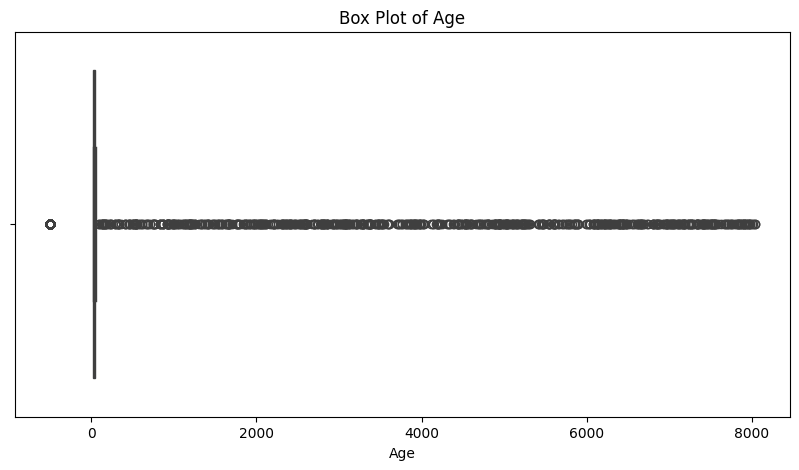

In [58]:
df_1["Age"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Age")

plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Age")
plt.title("Box Plot of Age")
plt.show()


In [59]:
get_iqr_lower_upper(df_1, "Age")
#  Outliers: (1067, 24)

Outliers: (1067, 24)


(-2.0, 70.0)

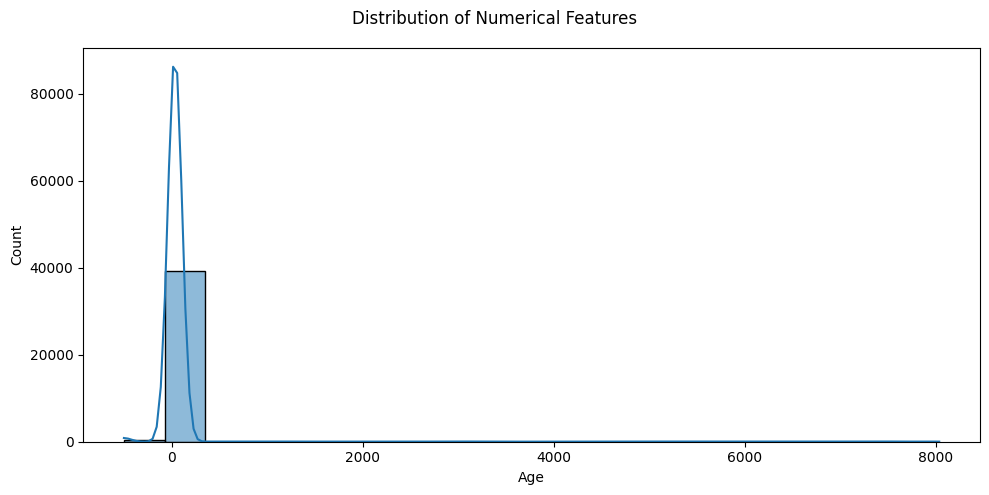

In [60]:

#  Distribution Analysis:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.histplot(data = df_1, x = "Age",kde=True,bins=20)
#plt.show()# Plot histograms for numerical features

plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()


In [61]:
get_iqr_lower_upper(df_1, "Annual_Income")
# Outliers: (1107, 24)

Outliers: (1107, 24)


(-60526.87999999999, 152949.91999999998)

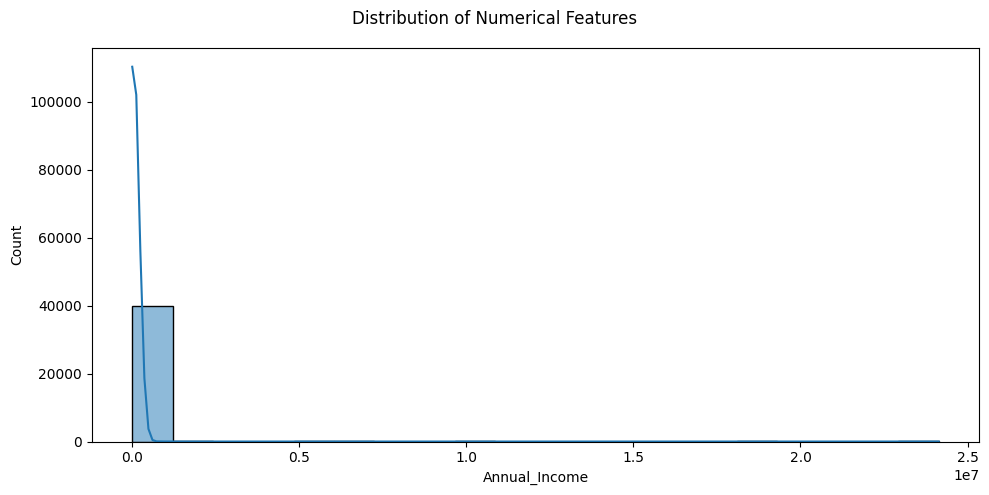

In [62]:

plt.figure(figsize = (10,5))
sns.histplot(data = df_1, x = "Annual_Income",kde=True,bins=20)
#plt.show()# Plot histograms for numerical features

plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()


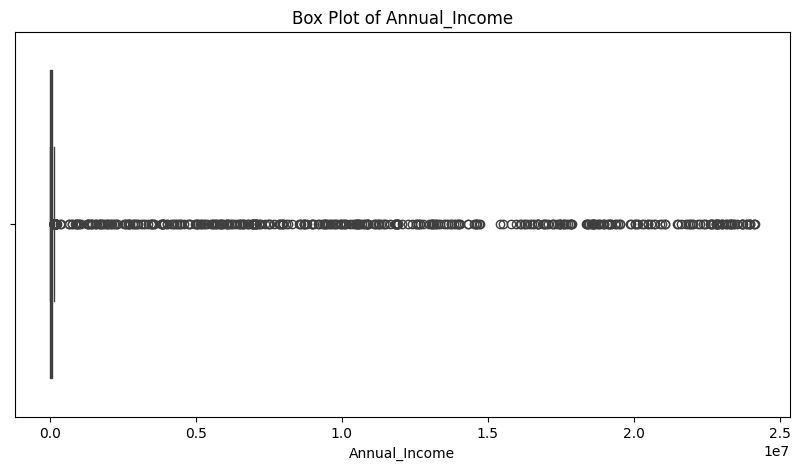

In [63]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Annual_Income")
plt.title("Box Plot of Annual_Income")
plt.show()

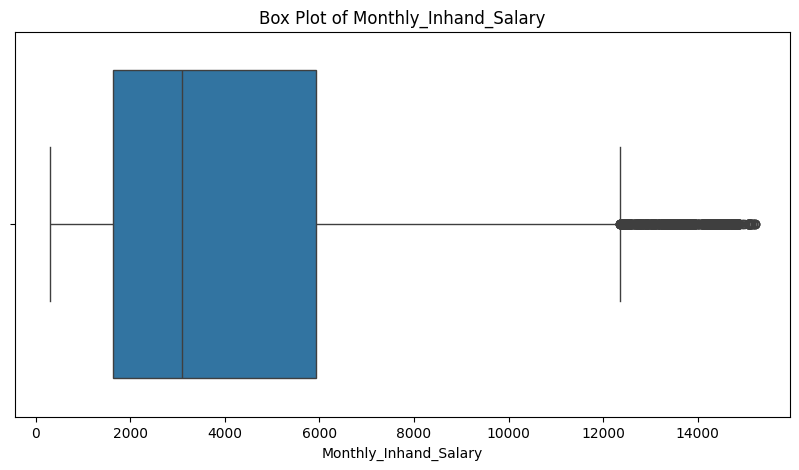

In [64]:
# monthly_inhand_salary
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Monthly_Inhand_Salary")
plt.title("Box Plot of Monthly_Inhand_Salary")
plt.show()

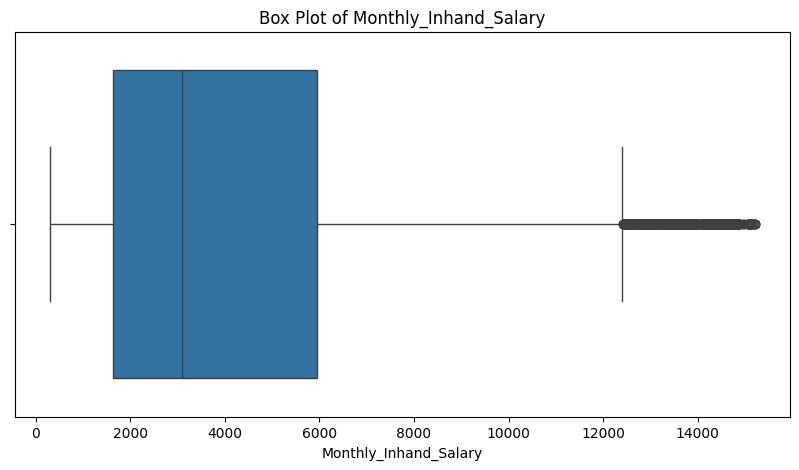

In [65]:
# manage outliere
df_1["Monthly_Inhand_Salary"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Monthly_Inhand_Salary")
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Monthly_Inhand_Salary")
plt.title("Box Plot of Monthly_Inhand_Salary")
plt.show()

In [66]:
get_iqr_lower_upper(df_1, "Monthly_Inhand_Salary")
# still has some otliers
# it seems like the replace_group_outliers_fillna function was not that effective on this column

Outliers: (794, 24)


(-4840.357708333333, 12406.203958333332)

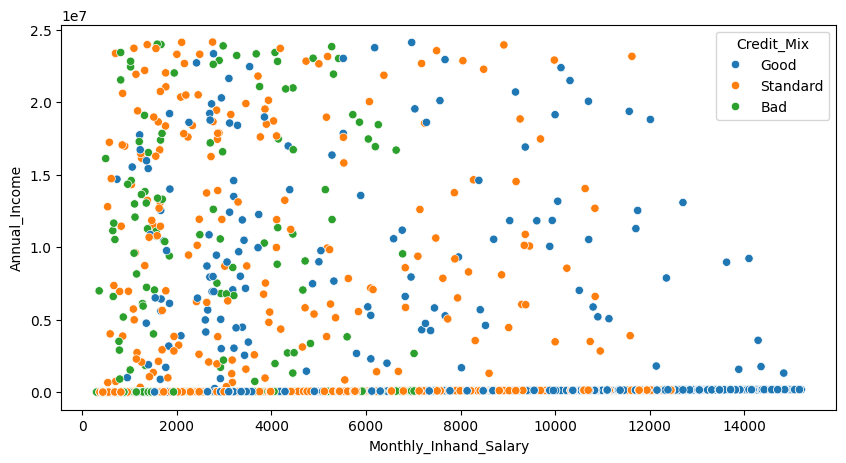

In [67]:
plt.figure(figsize = (10,5))
sns.scatterplot(data=df_1, x="Monthly_Inhand_Salary", y="Annual_Income", hue="Credit_Mix")
plt.show()
# high no linear corelation between features


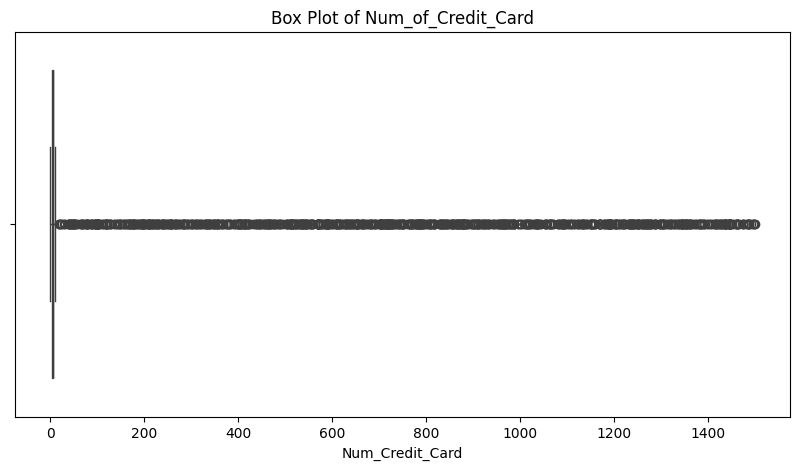

In [68]:

# num of credit card
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Card") # Changed column name to "Num_Credit_Card"
plt.title("Box Plot of Num_of_Credit_Card")
plt.show()

In [69]:
df_1["Num_Credit_Card"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_Credit_Card")

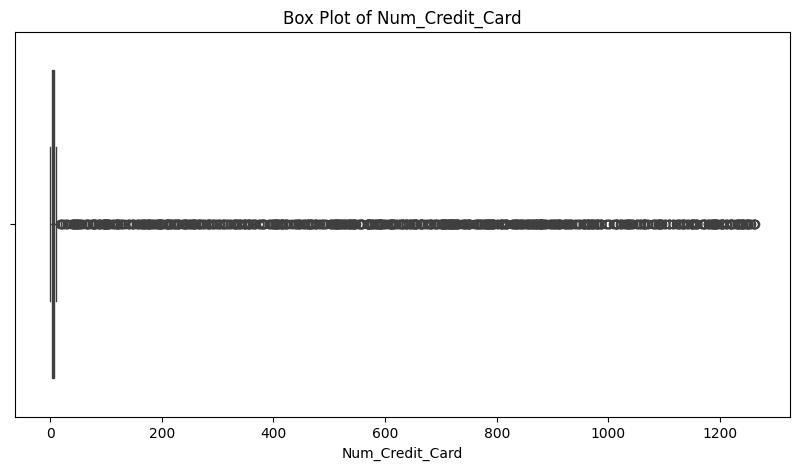

In [70]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Card")
plt.title("Box Plot of Num_Credit_Card")
plt.show()

In [71]:
get_iqr_lower_upper(df_1, "Num_Credit_Card")

Outliers: (798, 24)


(-0.5, 11.5)

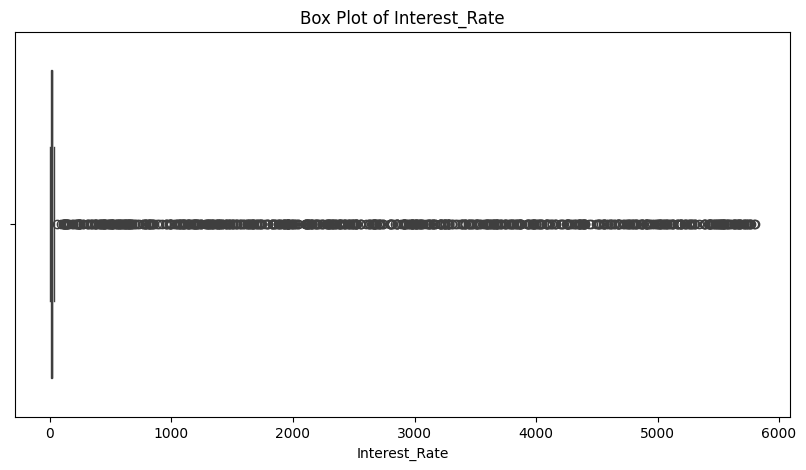

In [72]:
# intrest rate
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Interest_Rate")
plt.title("Box Plot of Interest_Rate")
plt.show()

In [73]:
df_1["Interest_Rate"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Interest_Rate")

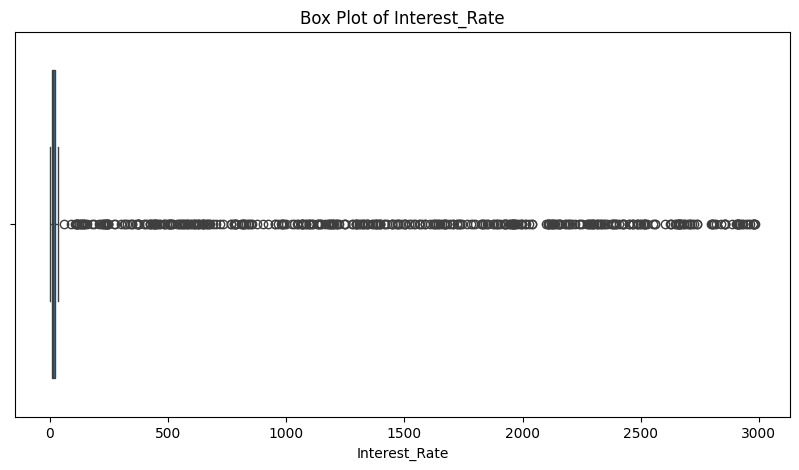

In [74]:

plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Interest_Rate")
plt.title("Box Plot of Interest_Rate")
plt.show()

In [75]:

get_iqr_lower_upper(df_1, "Interest_Rate")

Outliers: (427, 24)


(-12.5, 39.5)

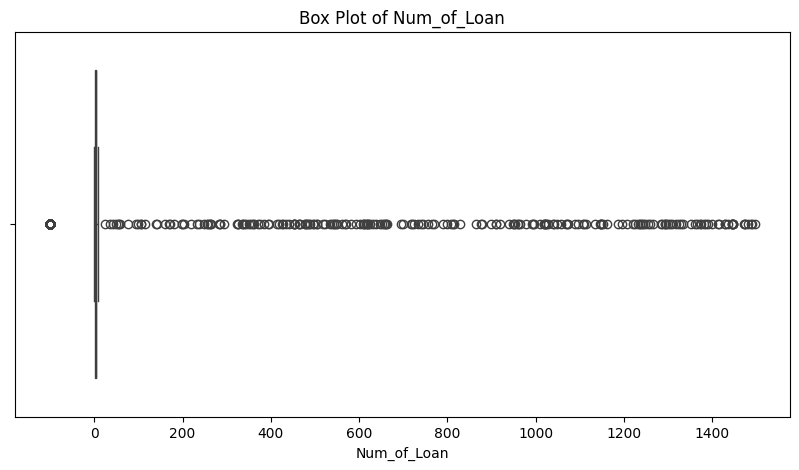

In [76]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Loan")
plt.title("Box Plot of Num_of_Loan")
plt.show()

In [77]:
df_1["Num_of_Loan"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_of_Loan")

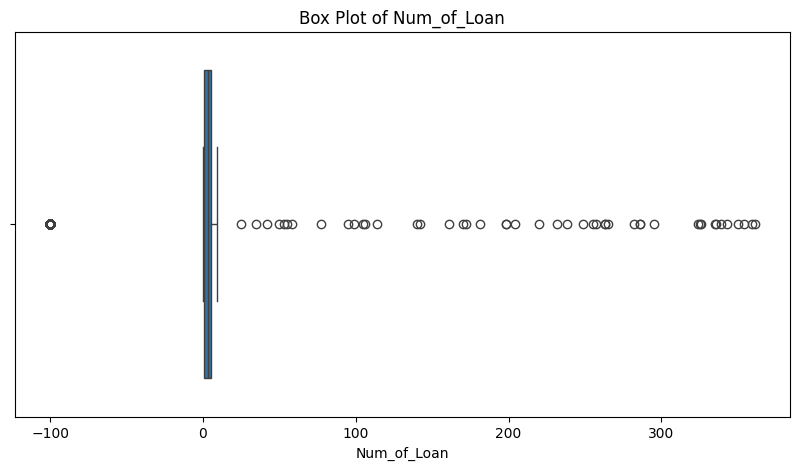

In [78]:

plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Loan")
plt.title("Box Plot of Num_of_Loan")
plt.show()

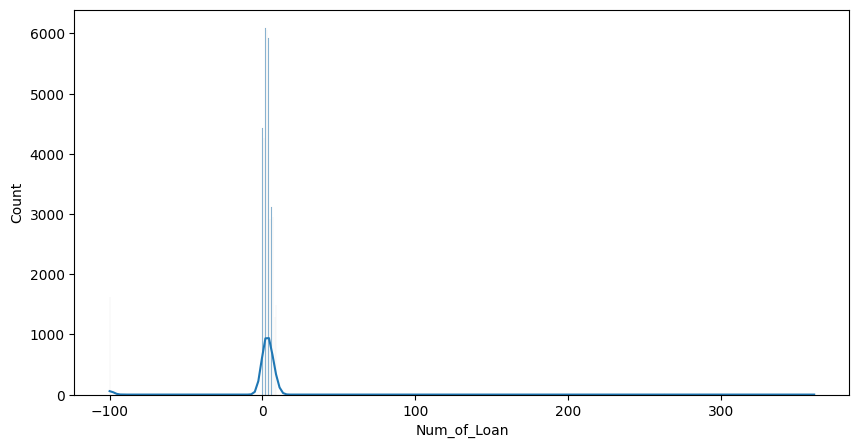

In [79]:
plt.figure(figsize = (10,5))
sns.histplot(data = df_1, x = "Num_of_Loan",kde=True)
plt.show()

In [80]:

get_iqr_lower_upper(df_1, "Num_of_Loan")

Outliers: (1663, 24)


(-5.0, 11.0)

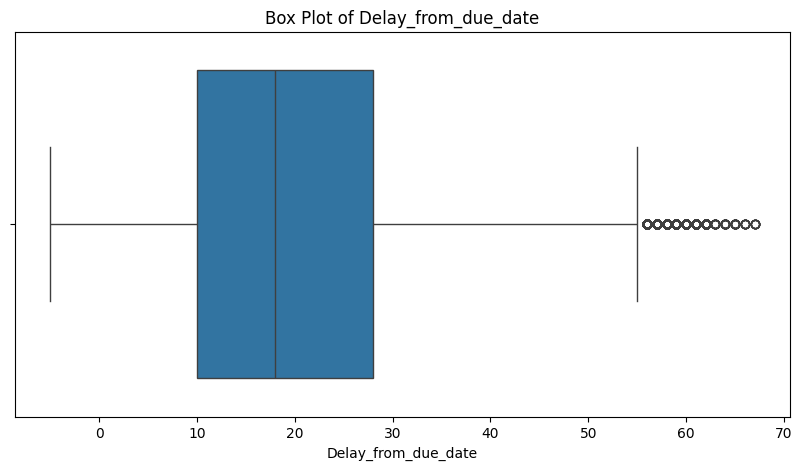

In [81]:
# delay_from_due_date
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Delay_from_due_date")
plt.title("Box Plot of Delay_from_due_date")
plt.show()

In [82]:
df_1["Delay_from_due_date"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Delay_from_due_date")

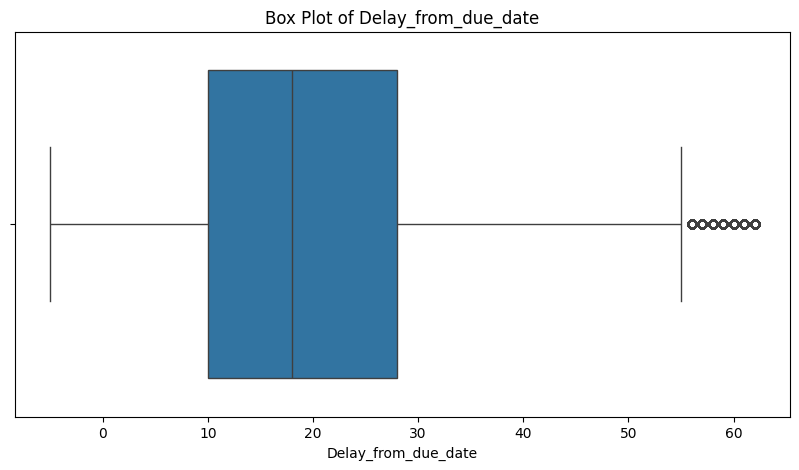

In [83]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Delay_from_due_date")
plt.title("Box Plot of Delay_from_due_date")
plt.show()

In [84]:
get_iqr_lower_upper(df_1, "Delay_from_due_date")

Outliers: (1599, 24)


(-17.0, 55.0)

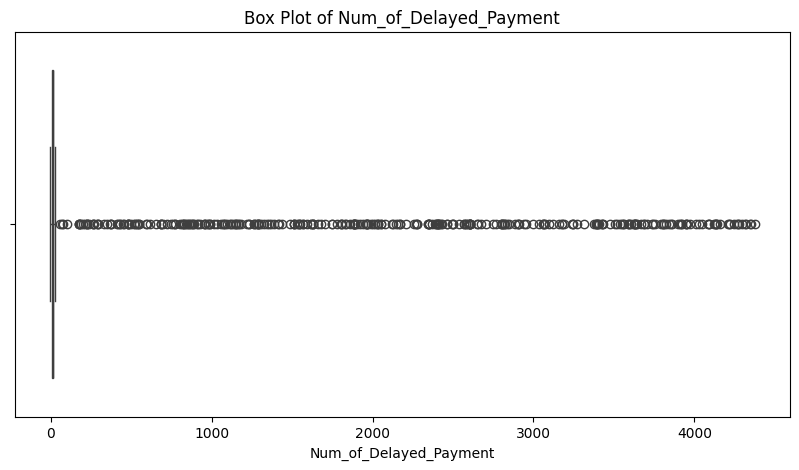

In [85]:
# Num_of_Delayed_Payment

plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Delayed_Payment")
plt.title("Box Plot of Num_of_Delayed_Payment")
plt.show()

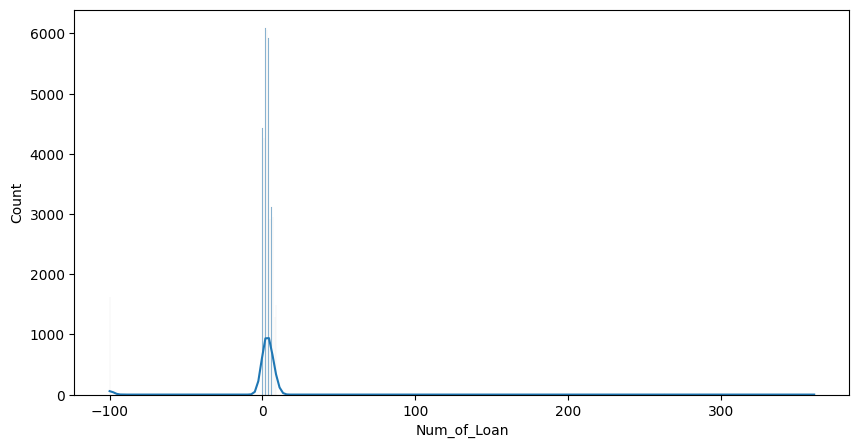

In [86]:
plt.figure(figsize = (10,5))
sns.histplot(data = df_1, x = "Num_of_Loan",kde=True)
plt.show()

In [87]:
df_1["Num_of_Delayed_Payment"] = replace_group_outliers_fillna(df_1, "Customer_ID","Num_of_Delayed_Payment")

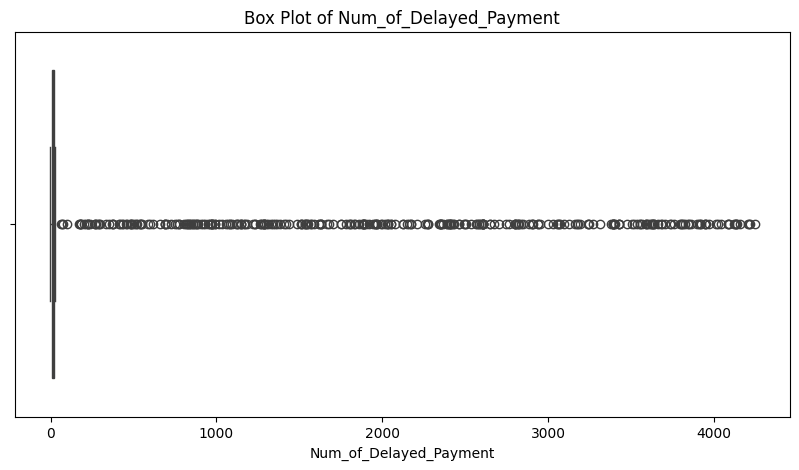

In [88]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_of_Delayed_Payment")
plt.title("Box Plot of Num_of_Delayed_Payment")
plt.show()

In [89]:

get_iqr_lower_upper(df_1, "Num_of_Delayed_Payment")

Outliers: (319, 24)


(-4.5, 31.5)

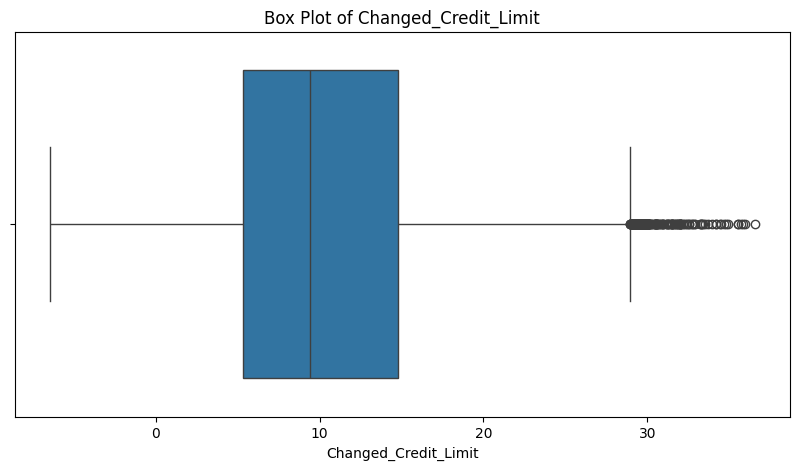

In [90]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Changed_Credit_Limit")
plt.title("Box Plot of Changed_Credit_Limit")
plt.show()

In [91]:
df_1["Changed_Credit_Limit"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Changed_Credit_Limit")

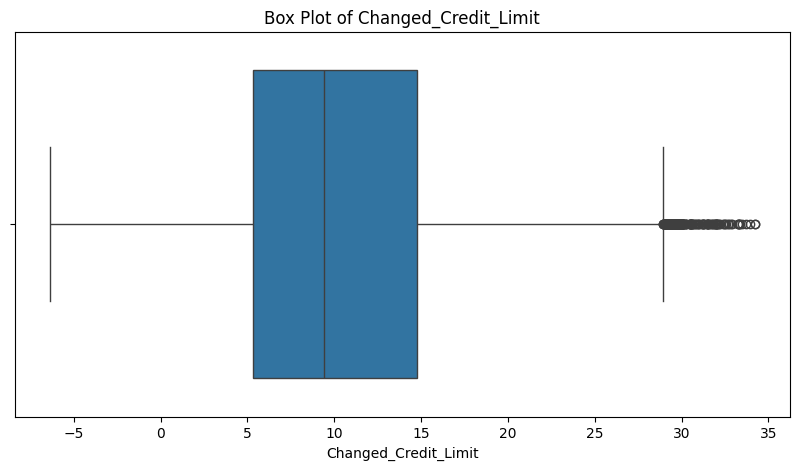

In [92]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Changed_Credit_Limit")
plt.title("Box Plot of Changed_Credit_Limit")
plt.show()

In [93]:
get_iqr_lower_upper(df_1, "Changed_Credit_Limit")

Outliers: (313, 24)


(-8.844999999999999, 28.955)

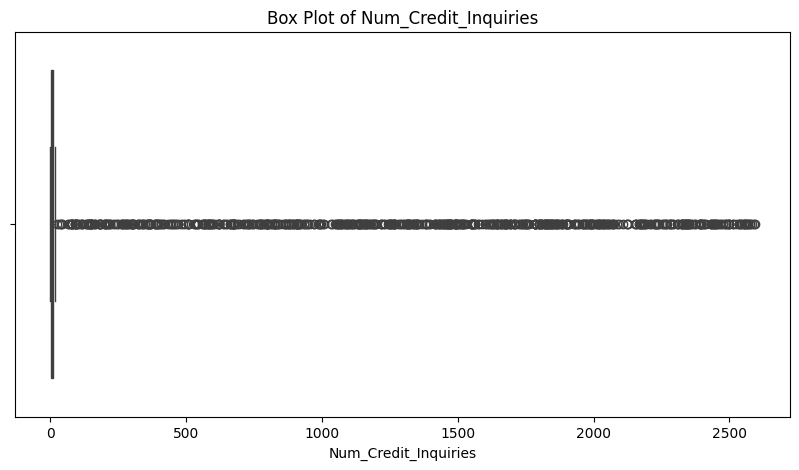

In [94]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Num_Credit_Inquiries")
plt.title("Box Plot of Num_Credit_Inquiries")
plt.show()

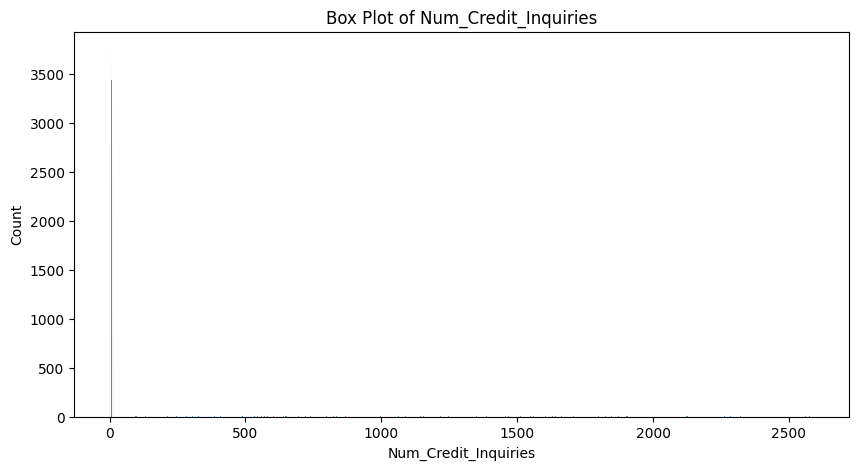

In [95]:
plt.figure(figsize = (10,5))
sns.histplot(data = df_1, x = "Num_Credit_Inquiries")
plt.title("Box Plot of Num_Credit_Inquiries")
plt.show()

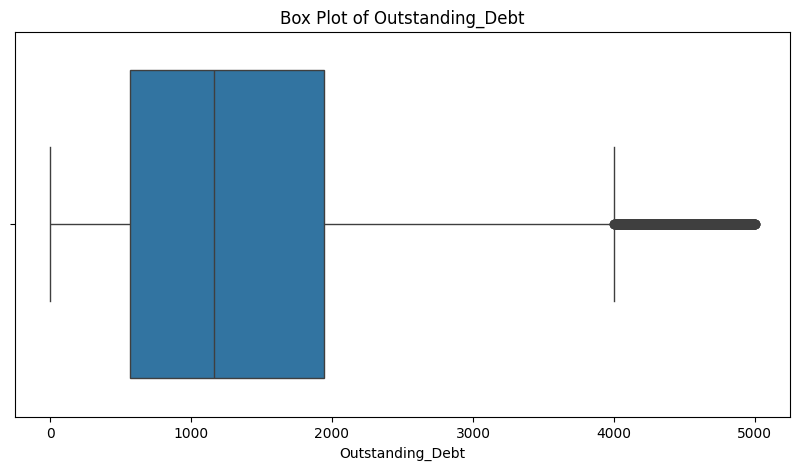

In [96]:
# outstanding_debt
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Outstanding_Debt")
plt.title("Box Plot of Outstanding_Debt")
plt.show()

In [97]:
df_1["Outstanding_Debt"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Outstanding_Debt")

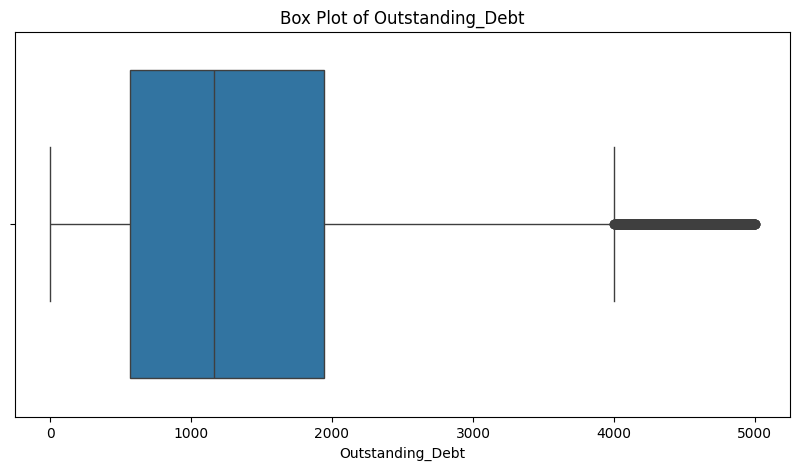

In [98]:

plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Outstanding_Debt")
plt.title("Box Plot of Outstanding_Debt")
plt.show()

In [99]:
#Credit_Utilization_Ratio

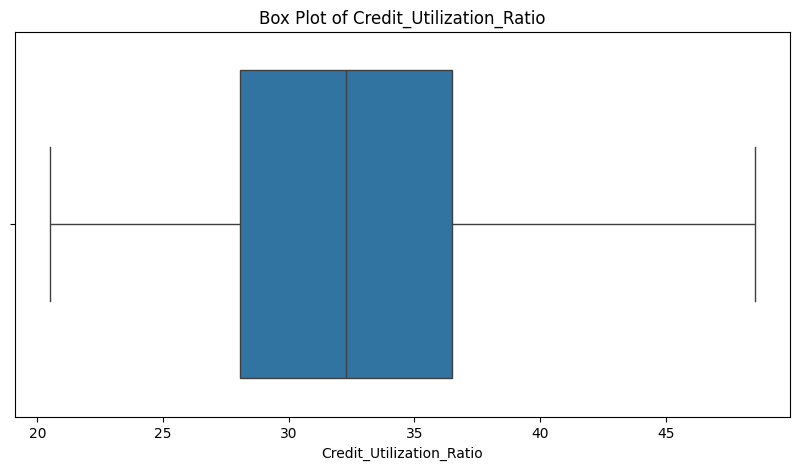

In [100]:

plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Credit_Utilization_Ratio")
plt.title("Box Plot of Credit_Utilization_Ratio")
plt.show()

In [101]:
df_1["Credit_Utilization_Ratio"].isnull().sum()
# not required

0

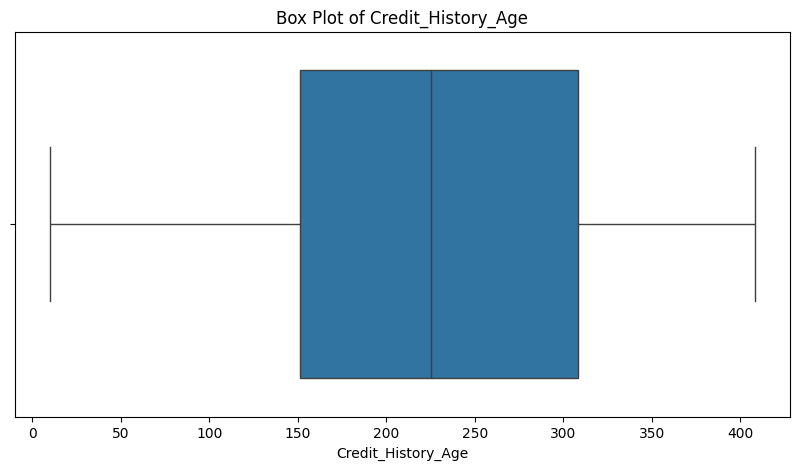

In [102]:
#
# Credit_History_Age
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Credit_History_Age")
plt.title("Box Plot of Credit_History_Age")
plt.show()


In [103]:
df_1['Credit_History_Age'] = df_1.groupby("Customer_ID", group_keys=False)["Credit_History_Age"].apply(lambda x: x.interpolate().bfill().ffill())


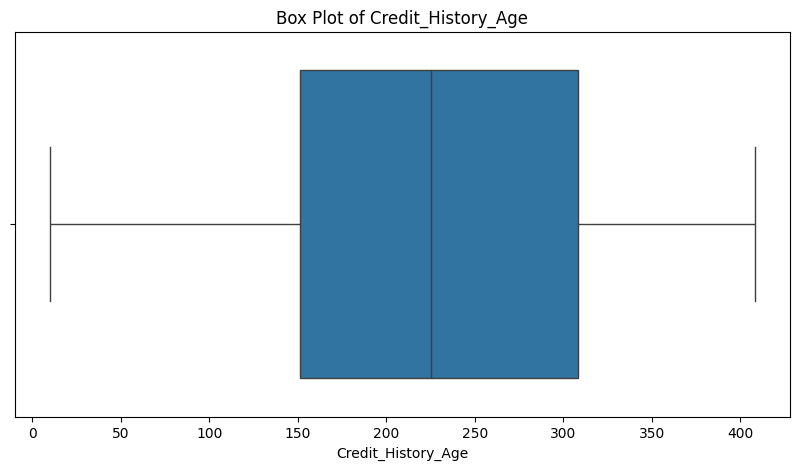

In [104]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Credit_History_Age")
plt.title("Box Plot of Credit_History_Age")
plt.show()

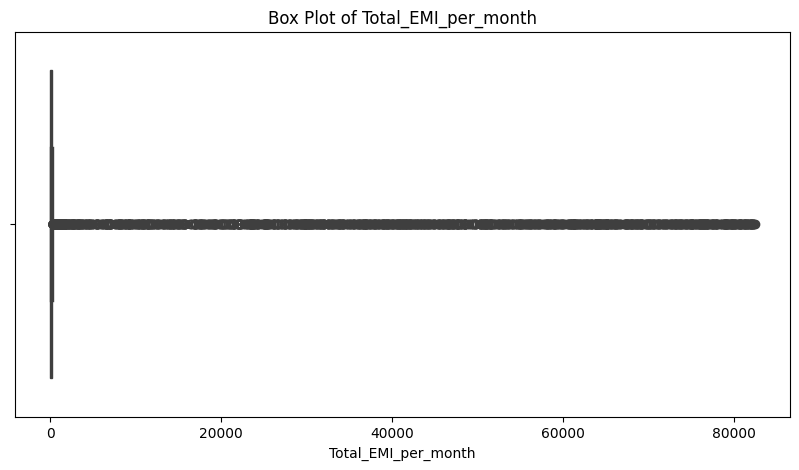

In [105]:

# Total_EMI_per_month
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Total_EMI_per_month")
plt.title("Box Plot of Total_EMI_per_month")
plt.show()

In [106]:
df_1["Total_EMI_per_month"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Total_EMI_per_month")


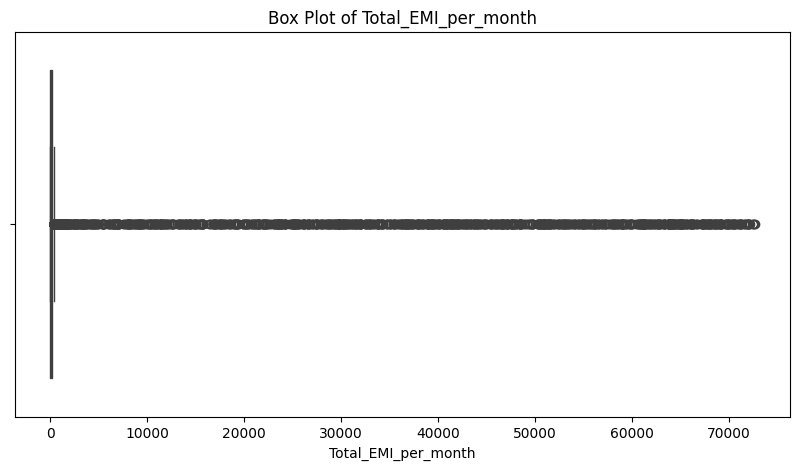

In [107]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Total_EMI_per_month")
plt.title("Box Plot of Total_EMI_per_month")
plt.show()

In [108]:
get_iqr_lower_upper(df_1, "Total_EMI_per_month")

Outliers: (3027, 24)


(-181.5152550929043, 388.15568489229196)

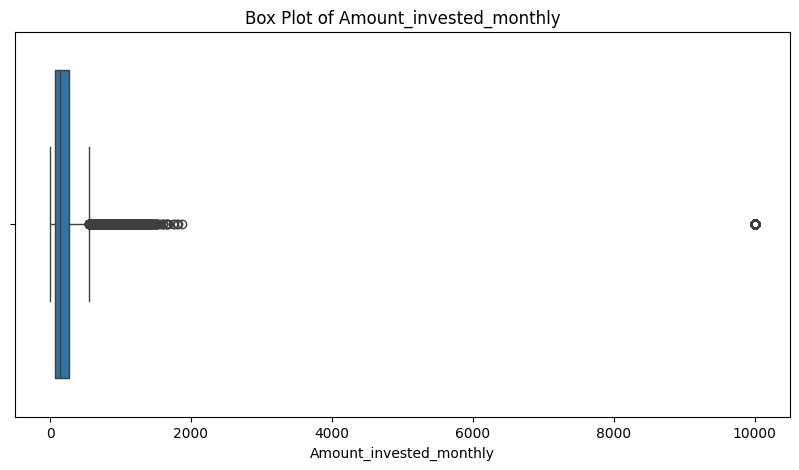

In [109]:

# Amount_invested_monthly
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Amount_invested_monthly")
plt.title("Box Plot of Amount_invested_monthly")
plt.show()

In [110]:
df_1["Amount_invested_monthly"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Amount_invested_monthly")

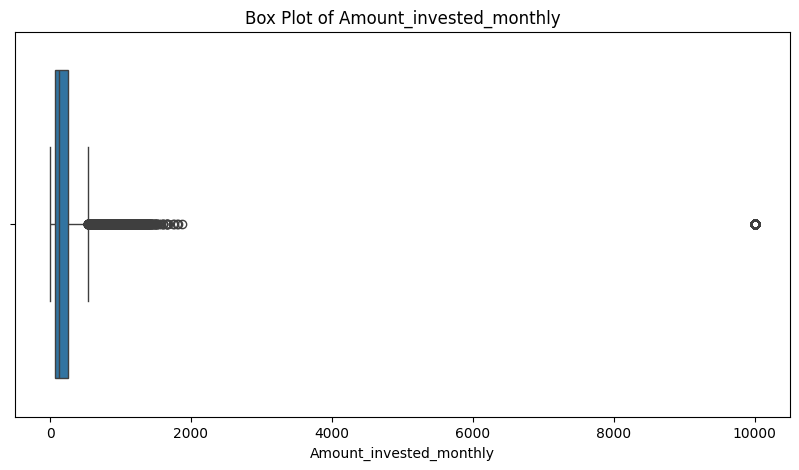

In [111]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df_1, x = "Amount_invested_monthly")
plt.title("Box Plot of Amount_invested_monthly")
plt.show()

In [112]:
# # Fill missing values with group median (based on 'Customer_ID')
# df_1['Monthly_Inhand_Salary'] = df_1.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(x.median()))


In [113]:


# Fill missing values for numerical columns in df_1
df_1['Monthly_Inhand_Salary'] = df_1['Monthly_Inhand_Salary'].fillna(df_1['Monthly_Inhand_Salary'].median())
df_1['Num_of_Delayed_Payment'] = df_1['Num_of_Delayed_Payment'].fillna(df_1['Num_of_Delayed_Payment'].median())
df_1['Changed_Credit_Limit'] = df_1['Changed_Credit_Limit'].fillna(df_1['Changed_Credit_Limit'].mode()[0])
df_1['Num_Credit_Inquiries'] = df_1['Num_Credit_Inquiries'].fillna(df_1['Num_Credit_Inquiries'].median())
df_1['Credit_History_Age'] = df_1['Credit_History_Age'].fillna(df_1['Credit_History_Age'].median())
df_1['Amount_invested_monthly'] = df_1['Amount_invested_monthly'].fillna(df_1['Amount_invested_monthly'].median())
df_1['Monthly_Balance'] = df_1['Monthly_Balance'].fillna(df_1['Monthly_Balance'].median())

# # Check if there are any missing values left
# print(df_1.isnull().sum())

# # Visualizing missing data before filling
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.heatmap(df_1.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Data Heatmap (Before)')
# plt.show()

# # Visualizing missing data after filling
# sns.heatmap(df_1.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Data Heatmap (After)')
# plt.show()


In [114]:
missing_data(df_1)

,Feature,Null_Values,%_age


In [115]:
df_1[df_1["Customer_ID"]==22931]
# see this customer has negative bank account which cant be possible

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
27817,22931,10,41.0,Developer,30352.11,2317.3425,-1,4.0,7.0,1.0,...,0.0,Good,644.57,36.605320,290.0,NM,16.483566,75.160896,High_spent_Medium_value_payments,390.089788
27818,22931,11,41.0,Developer,30352.11,2317.3425,-1,4.0,7.0,1.0,...,0.0,Good,644.57,28.301857,291.0,No,16.483566,175.280375,Low_spent_Large_value_payments,309.970309
27819,22931,12,41.0,Developer,30352.11,2317.3425,-1,4.0,7.0,1.0,...,3.0,Good,644.57,24.549338,292.0,No,16.483566,240.817378,Low_spent_Small_value_payments,264.433305


In [116]:
# hence replace them with zero
df_1.loc[df_1["Num_Bank_Accounts"]<0, "Num_Bank_Accounts"]=0
#
# Delay_from_due_date : Cannot be less than 0

In [117]:
# replacing zero with NaN
df_1.loc[df_1["Delay_from_due_date"]<0, "Delay_from_due_date"] = np.NaN

In [118]:
df_1["Delay_from_due_date"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Delay_from_due_date")


In [119]:
df_1.loc[df_1["Num_of_Delayed_Payment"]<0, "Num_of_Delayed_Payment"] = np.NaN
df_1["Num_of_Delayed_Payment"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Num_of_Delayed_Payment")
#Monthly_Balance : Cannot be less than 0

In [120]:
df_1.loc[df_1["Monthly_Balance"]<0, "Monthly_Balance"] = np.NaN
df_1["Monthly_Balance"] = replace_group_outliers_fillna(df_1, "Customer_ID", "Monthly_Balance")
#Amount_invested_monthly

In [121]:
get_iqr_lower_upper(df_1, "Amount_invested_monthly")

Outliers: (4246, 24)


(-208.56584430357037, 543.117453829196)

In [122]:

# This feature has too many outliers.

df_1["Amount_invested_monthly"].describe()

,Amount_invested_monthly
count,40195.000000
mean,622.455293
std,2017.537808
min,0.000000
25%,73.315392
50%,133.374913
75%,261.236217
max,10000.000000


In [123]:
 #Anything above the max value is considered as outlier.
df_1.loc[df_1["Amount_invested_monthly"]>=10000, "Amount_invested_monthly"] = np.NaN
# fill group Mode
df_1["Amount_invested_monthly"] = df_1.groupby("Customer_ID")["Amount_invested_monthly"].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
get_iqr_lower_upper(df_1, "Amount_invested_monthly")


Outliers: (2616, 24)


(-76.14446219002416, 246.62252321889275)

In [124]:

df_1.to_csv("cleaned_train.csv",index=False)
print ('save ')

save 


In [125]:
# final

In [126]:
import matplotlib as mpl
import scipy.stats as stats

sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style("whitegrid")

import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [127]:
df_2 = pd.read_csv("cleaned_train.csv")
df_2.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,3392,9,23.0,Scientist,19114.12,1824.843333,3,4.0,3.0,4.0,...,2022.0,Good,809.98,35.030402,273.0,No,49.574949,21.465380,Low_spent_Small_value_payments,186.266702
1,3392,10,24.0,Scientist,19114.12,1824.843333,3,4.0,3.0,4.0,...,4.0,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,3392,11,24.0,Scientist,19114.12,1824.843333,3,4.0,3.0,4.0,...,4.0,Good,809.98,33.811894,275.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,264.675446
3,3392,12,24.0,Scientist,19114.12,1824.843333,3,4.0,3.0,4.0,...,4.0,Good,809.98,32.430559,276.0,No,49.574949,21.465380,High_spent_Medium_value_payments,343.826873
4,8625,9,28.0,Teacher,34847.84,3037.986667,2,4.0,6.0,1.0,...,5.0,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434


In [128]:
df_2. isnull().sum()

,0
Customer_ID,0
Month,0
Age,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0


In [129]:
# now final eda

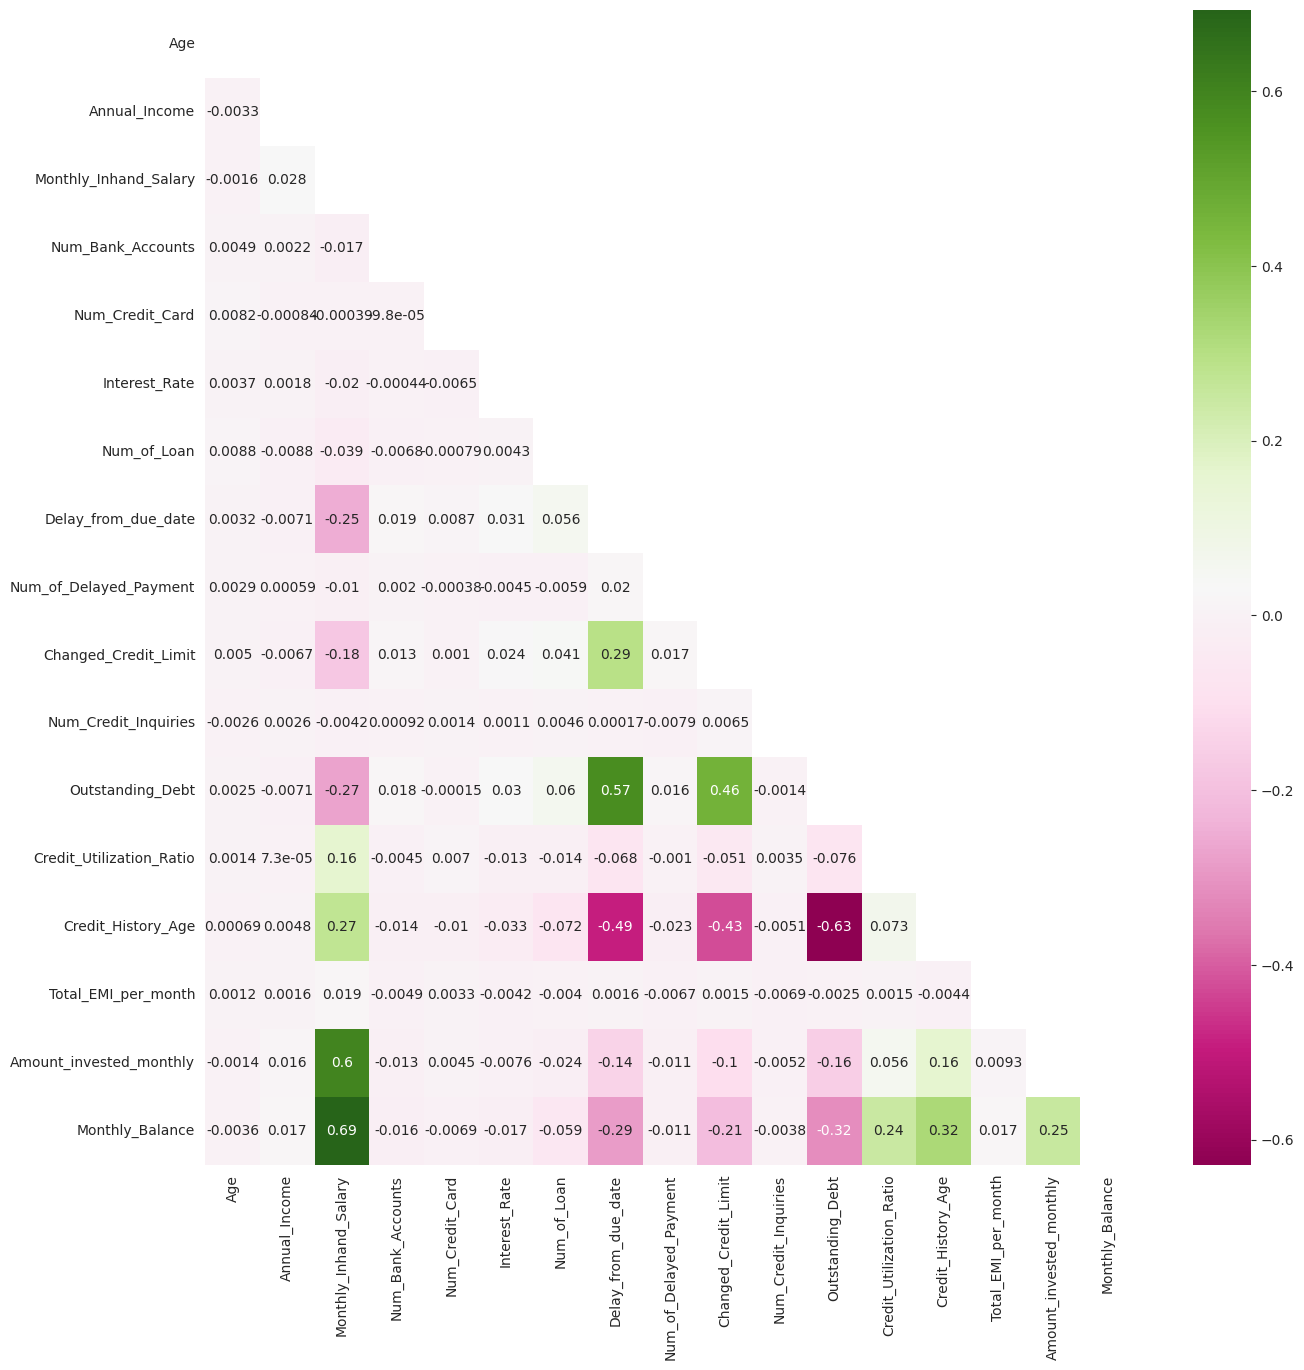

In [130]:
df_2.drop(columns=["Customer_ID", "Month"], inplace=True)
# Correlation between Numerical features
plt.figure(figsize=(15, 15))
sns.heatmap(df_2.select_dtypes(include = "number").corr(),
            mask=np.triu(np.ones_like(df_2.select_dtypes(include = "number").corr(), dtype=bool)),
            annot=True, cmap="PiYG")
plt.show()

In [131]:
#Train-Test Split
# Monthly in hand salary and anual income highly correlated
X = df_2.drop(columns=["Credit_Mix"])
y = df_2["Credit_Mix"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=42)


In [132]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28136, 21)
(28136,)
(12059, 21)
(12059,)


In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# should be used to encode target values, i.e. y, and not the input X.
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [134]:
# Converting categorical variables to numbers (one-hot encoding)
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin):
    def __init__(self, data_sep=',', col_name_sep='_'):
        self.data_sep     = data_sep
        self.col_name_sep = col_name_sep

    def fit(self, X, y  = None):
        object_cols       = X.select_dtypes(include="object").columns
        self.dummy_cols   = [col for col in object_cols if X[col].str.contains(self.data_sep, regex=True).any()]
        self.dummy_prefix = [''.join(map(lambda x: x[0], col.split(self.col_name_sep)))  if self.col_name_sep in col else col[:2] for col in self.dummy_cols]

        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            dummy_X = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

        dummy_X.drop(columns = self.dummy_cols, inplace=True)
        self.columns = dummy_X.columns
        return self

    def transform(self, X, y = None):
        for col, pre in zip(self.dummy_cols, self.dummy_prefix):
            X_transformed = X.join(X[col].str.get_dummies(sep=self.data_sep).add_prefix(pre+self.col_name_sep))

        X_transformed = X_transformed.reindex(columns=self.columns, fill_value=0)
        return X_transformed

    # to get feature names
    def get_feature_names_out(self, input_features=None):
        return self.columns.tolist()


The above function is for the column in which the categorical variables are seperated by comma or some seperator, in our case it is just one column "Type_of_loan". Note : Now the column "Type of loan" has been dropped and instead we have one hot vectors for its place."

In [135]:
dummy = GetDummies()
X_train_dummy = dummy.fit_transform(X_train)
X_test_dummy   = dummy.transform(X_test)
X_train_dummy = X_train_dummy.reset_index(drop=True)
X_test_dummy = X_test_dummy.reset_index(drop=True)
# resetting index so that in future we can work with indexes


Apart from "Type_of_Loan" other categorical varaible needs to be converted into numbers.
Assuming the features are Nominal (data represents categories without any inherent order or hierarchy.) One-hot encoding is commonly used for nominal data.

In [136]:
from sklearn.preprocessing import OneHotEncoder
cat = X_train_dummy.select_dtypes(include="object").columns.tolist()
print('Features which requires OneHotEncoder:', cat)

Features which requires OneHotEncoder: ['Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [137]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [138]:

X_train_cat = pd.DataFrame(ohe.fit_transform(X_train[cat]),columns=ohe.get_feature_names_out())
X_test_cat = pd.DataFrame(ohe.transform(X_test[cat]),columns=ohe.get_feature_names_out())
X_train_ohe = X_train_cat.join(X_train_dummy.select_dtypes("number"))
X_test_ohe = X_test_cat.join(X_test_dummy.select_dtypes("number"))

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_ohe)
X_test_scaled = sc.transform(X_test_ohe)

In [140]:

# Model Training
# Random Forest Classifier

In [141]:
rfc = RandomForestClassifier(random_state = 1337)
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=1337)

In [142]:

y_pred = rfc.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2852
           1       0.97      0.98      0.98      3736
           2       0.98      0.97      0.98      5471

    accuracy                           0.98     12059
   macro avg       0.98      0.98      0.98     12059
weighted avg       0.98      0.98      0.98     12059



In [143]:

#With Best Parameters (GridsearchCV)

rfc_best = RandomForestClassifier(random_state=1337)
param_grid = {
    "class_weight": ["balanced"], # [None, 'balanced', 'balanced_subsample']
    "n_estimators": np.linspace(100, 200, 2, dtype=int),
    "criterion"   : ["gini", "entropy"],
    "max_depth"   : np.arange(2, 3, 1),
    "min_impurity_decrease": [0],
    "oob_score"   : [True],
}
grid_model_rfc = GridSearchCV(
    estimator=rfc_best,
    param_grid=param_grid,
    scoring = "accuracy",
    error_score="raise",
    n_jobs = -1,
    cv=5,
)

In [144]:
grid_model_rfc.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=1337), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([2]), 'min_impurity_decrease': [0],
                         'n_estimators': array([100, 200]),
                         'oob_score': [True]},
             scoring='accuracy')

In [145]:
# Get the best hyperparameters
best_paramsl_rfc = grid_model_rfc.best_params_
best_paramsl_rfc, grid_model_rfc.best_score_

({'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': 2,
  'min_impurity_decrease': 0,
  'n_estimators': 100,
  'oob_score': True},
 0.8439720335083576)

In [146]:
y_pred = grid_model_rfc.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      2852
           1       0.81      0.99      0.89      3736
           2       0.99      0.67      0.80      5471

    accuracy                           0.85     12059
   macro avg       0.85      0.89      0.85     12059
weighted avg       0.88      0.85      0.84     12059



In [147]:
# logistic regression

In [151]:



# Create an imputer to replace NaNs with the median
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform both train and test data
X_train_imputed = imputer.fit_transform(X_train_ohe)
X_test_imputed = imputer.transform(X_test_ohe)

# Scale the imputed data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_imputed)
X_test_scaled = sc.transform(X_test_imputed)

# Now, fit the Logistic Regression model
lr = LogisticRegression(random_state=1337)
lr.fit(X_train_scaled, y_train)



LogisticRegression(random_state=1337)

In [152]:
y_pred = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2852
           1       0.80      0.89      0.84      3736
           2       0.85      0.78      0.81      5471

    accuracy                           0.84     12059
   macro avg       0.84      0.85      0.84     12059
weighted avg       0.84      0.84      0.84     12059



In [153]:

#With Best Parameters (GridsearchCV)

lr_best = LogisticRegression(random_state=1337)
param_grid = {
    # "penalty"     : ["l1", "l2"],
    "C"           : np.linspace(0.01, 1, 2).round(3),
    "class_weight": ["balanced"],
    # "solver"      : ["saga", "liblinear"]
}
grid_model_lr = GridSearchCV(
    estimator=lr_best,
    param_grid=param_grid,
    scoring = "accuracy",
    error_score="raise",
    n_jobs = -1,
    cv=5,
)

In [154]:
grid_model_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(random_state=1337), n_jobs=-1,
             param_grid={'C': array([0.01, 1.  ]),
                         'class_weight': ['balanced']},
             scoring='accuracy')

In [155]:
y_pred = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2852
           1       0.80      0.89      0.84      3736
           2       0.85      0.78      0.81      5471

    accuracy                           0.84     12059
   macro avg       0.84      0.85      0.84     12059
weighted avg       0.84      0.84      0.84     12059



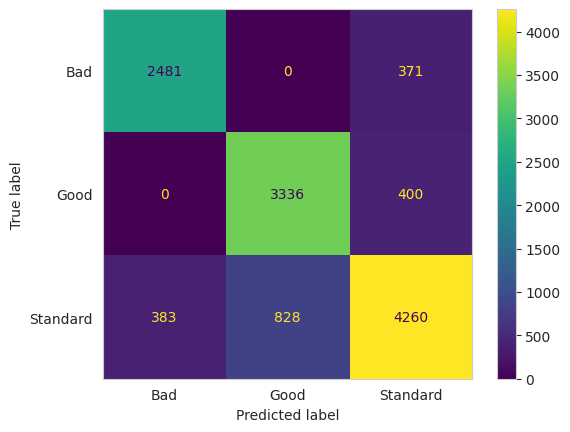

In [168]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.show()

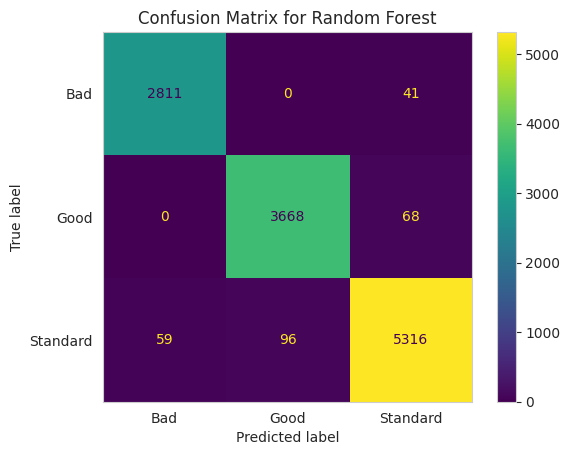

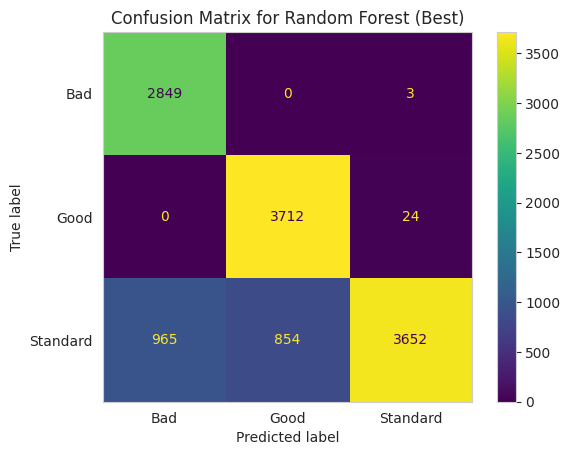

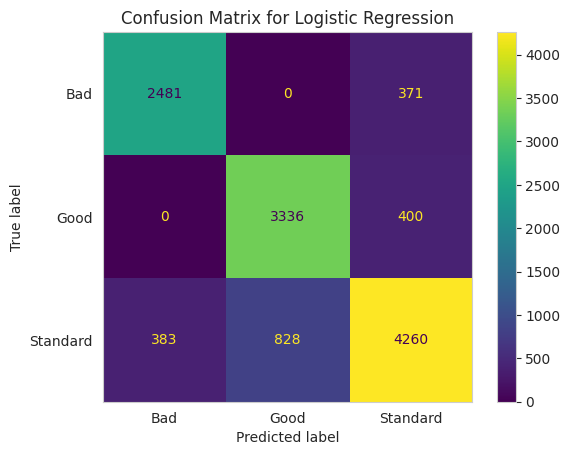

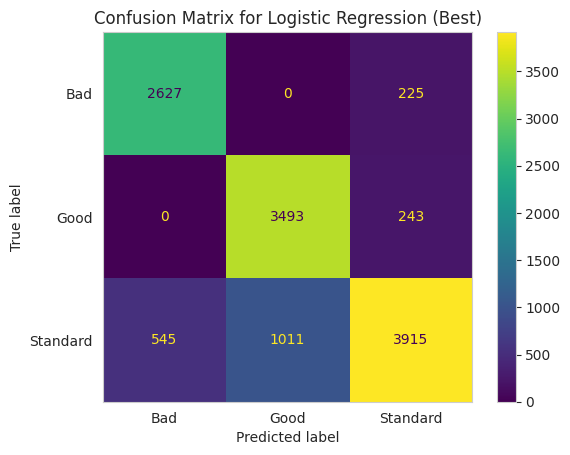

In [170]:


#  multiple models trained (e.g., rfc, grid_model_rfc, lr, grid_model_lr)
# and their corresponding predictions (y_pred)

models = {
    "Random Forest": rfc,
    "Random Forest (Best)": grid_model_rfc,
    "Logistic Regression": lr,
    "Logistic Regression (Best)": grid_model_lr,

}

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

In [178]:
d = X_test.iloc[0:1]
d

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
4347,44.0,Mechanic,15712.65,1195.3875,10,7.0,22.0,9.0,"student loan,mortgage loan,payday loan,not spe...",23.0,...,16.94,12.0,2540.41,31.786506,141.0,Yes,79.866759,85.020642,Low_spent_Small_value_payments,189.235293


In [181]:
y_test[0:1]  # Use array slicing instead of .iloc


array([0])

All test dataset rows =  12059


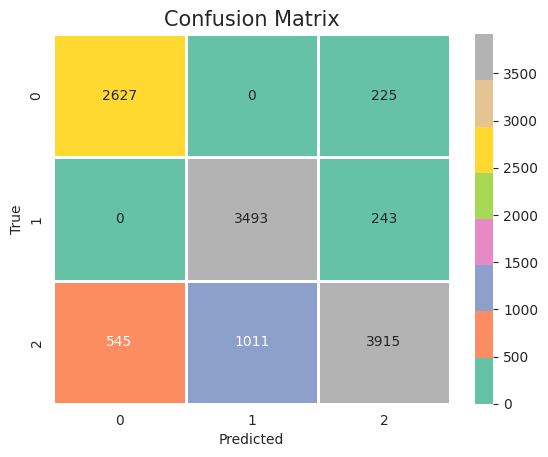

In [184]:
print("All test dataset rows = ",len(X_test))
cm=confusion_matrix(y_test,y_pred) # Changed Y_test and Y_pred to y_test and y_pred
# The target variable has 3 classes instead of 2. Adjust class_label accordingly.
class_label = [0, 1, 2]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [187]:
print(np.sum(y_test == 1))
print(np.sum(y_test == 0))

3736
2852



# Project Summary:
- The project focuses on credit risk analysis using a dataset that includes various customer financial details.
- The initial steps involved exploratory data analysis (EDA) with visualizations (scatterplots, boxplots, histograms)
- to understand the distributions and relationships between features.  Outlier treatment was applied to several numerical
- features (e.g., 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan') using a custom function (replace_group_outliers_fillna).
- Missing values were handled by imputation (median, mode). Inconsistent data like negative values in certain columns were corrected.

- Feature Engineering:
- Categorical features were preprocessed using custom OneHotEncoding function (GetDummies) and scikit-learn's OneHotEncoder.
- Numerical features were scaled using StandardScaler.
- The 'Monthly_Inhand_Salary' and 'Annual_Income' features were found highly correlated and were processed accordingly.

- Model Training and Evaluation:
 Two primary models were trained and evaluated: Random Forest and Logistic Regression.
- Each was trained and evaluated with default parameters and then tuned using GridSearchCV.
- Performance metrics (classification report, confusion matrices) were generated to compare the models.


#- Recommended ML Model:
- Based on the provided code, the **Random Forest Classifier (especially after hyperparameter tuning with GridSearchCV)** appears to be the more promising model.  
- While the code shows both models' performance, the Random Forest, generally excels at handling complex non-linear relationships
- among features and typically offers better performance in classification tasks when compared with Logistic Regression. The GridSearchCV further optimizes the model.
- A more definitive conclusion would require a more in-depth analysis including comparing  ROC AUC,  precision-recall curves, and potentially other relevant metrics.

In [188]:
# help to solve this model
#1. google bard
#2.chatgpt
#3 .geeksforgeeks:  https://www.geeksforgeeks.org/getting-started-with-classification/?ref=header_outind